Problem 1 (24 points): 
In this problem, you will code your own cross-validation procedure and
test it out on simulated data. Generate the simulated data as follows. Let x be a standard normal
random variable and y = 0.5 + 0.5x − x2 + x3 + ε where ε is also a standard normal. Draw n = 100
samples that will be used for training and validation, and another n = 100 samples that will be
used for evaluating test error.

(a) (10 points) Perform holdout validation on linear, quadratic, cubic, quartic, and quintic func-
tions. Produce a plot with x-axis being complexity, y-axis MSE, and curve of validated
MSE and the true test MSE. [Here, the true test MSE is the MSE obtained by fitting the a
given complexity model to the test data]. Repeat the same steps for 10-fold validation and
leave-one-out validation.

(b) (6 points) What is the optimal complexity chosen by each validation approach? What about
the corresponding validation MSE? Which validation approach performs most favorably?

(c) (6 points) Repeat step (a) but with seed numbers 5 and 10. What do you notice?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
np.random.seed(1)

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
# Generate the data - linear
X_train = np.random.normal(loc=0.0, scale=1.0, size = 100) # Training data
X_train = X_train.reshape(-1,1)

X_test = np.random.normal(loc=0.0, scale=1.0, size = 100) # Testing
X_test = X_test.reshape(-1,1)

epsilon_train = np.random.normal(loc=0.0, scale = 1.0, size = 100)
epsilon_train = epsilon_train.reshape(-1,1)

epsilon_test = np.random.normal(loc=0.0, scale = 1.0, size = 100)
epsilon_test = epsilon_test.reshape(-1,1)

In [4]:
# Quadratic

X2_train = np.power(X_train,2)
X2_test = np.power(X_test,2)

# Cubic
X3_train = np.power(X_train, 3)
X3_test = np.power(X_test, 3)

# Quartic
X4_train = np.power(X_train, 4)
X4_test = np.power(X_test, 4)

# Quintic
X5_train = np.power(X_train, 5)
X5_test = np.power(X_test, 5)

In [5]:
def generate_y(x_normal, epsilon_normal):
    y = 0.5 + 0.5*x_normal - np.power(x_normal,2) + np.power(x_normal,3) + epsilon_normal
    
    return (y)

In [6]:
y_train = generate_y(X_train, epsilon_train)
y_test = generate_y(X_test, epsilon_test)

In [7]:
# Quadratic:
y2_train = generate_y(X2_train, epsilon_train)
y2_test = generate_y(X2_test, epsilon_test)

# Cubic
y3_train = generate_y(X3_train, epsilon_train)
y3_test = generate_y(X3_test, epsilon_test)

# Quartic
y4_train = generate_y(X4_train, epsilon_train)
y4_test = generate_y(X4_test, epsilon_test)

# Quintic
y5_train = generate_y(X5_train, epsilon_train)
y5_test = generate_y(X5_test, epsilon_test)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
complexity = [1,2,3,4,5]
score_holdout = []
val_score_holdout = []

In [10]:
LR = LinearRegression() # linear
L2R = LinearRegression() # Quadratic
L3R = LinearRegression() # Cubic
L4R = LinearRegression() # Quadratic
L5R = LinearRegression() # Quintic

In [12]:
LR.fit(X_train, y_train)
val_score_holdout.append(LR.fit(X_train, y_train).score(X_train, y_train))
y_preds = LR.predict(X_test)
mse_1 = mean_squared_error(y_test,y_preds)
print(f'Mean Squared Error: {mse_1}')
score_holdout.append(mse_1)

Mean Squared Error: 4.89367345912392


In [13]:
L2R.fit(X2_train, y_train)
y_2preds = L2R.predict(X2_test)
val_score_holdout.append(L2R.fit(X2_train, y_train).score(X2_train, y_train))
mse_2 = mean_squared_error(y_test,y_2preds)
print(f'Mean Squared Error: {mse_2}')
score_holdout.append(mse_2)

Mean Squared Error: 14.044002299653455


In [14]:
L3R.fit(X3_train, y_train)
y_3preds = L3R.predict(X3_test)
val_score_holdout.append(L3R.fit(X3_train, y_train).score(X3_train, y_train))
mse_3 = mean_squared_error(y_test,y_3preds)
print(f'Mean Squared Error: {mse_3}')
score_holdout.append(mse_3)

Mean Squared Error: 2.641708580212363


In [15]:
L4R.fit(X4_train, y_train)
val_score_holdout.append(L4R.fit(X4_train, y_train).score(X4_train, y_train))
y_4preds = L4R.predict(X4_test)
mse_4 = mean_squared_error(y_test,y_4preds)
print(f'Mean Squared Error: {mse_4}')
score_holdout.append(mse_4)

Mean Squared Error: 16.542191432909327


In [16]:
L5R.fit(X5_train, y_train)
val_score_holdout.append(L5R.fit(X5_train, y_train).score(X5_train, y_train))
y_5preds = L5R.predict(X5_test)
mse_5 = mean_squared_error(y_test,y_5preds)
print(f'Mean Squared Error: {mse_5}')
score_holdout.append(mse_5)

Mean Squared Error: 5.6677380636827


In [17]:
print(score_holdout)
print(val_score_holdout)

[4.89367345912392, 14.044002299653455, 2.641708580212363, 16.542191432909327, 5.6677380636827]
[0.5027836125778968, 0.1475562965124737, 0.7520246243552473, 0.19029610854435763, 0.7461527378566353]


## Cross Validation

In [18]:
import statistics as s

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression

def cross_val_score(X, y, k):
    # Shuffle the data
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Split the data into k-folds
    fold_size = X.shape[0] // k
    fold_indices = [(i*fold_size, (i+1)*fold_size) for i in range(k)]
    if X.shape[0] % k != 0:
        fold_indices[-1] = (fold_indices[-1][0], X.shape[0])

    # Initialize a linear regression model
    model = LinearRegression()

    # Loop over each fold and train/test on that fold
    score = []
    val_score = []
    for i in range(k):
        # Split the data into training and testing sets for this fold
        test_start, test_end = fold_indices[i]
        X_test, y_test = X[test_start:test_end], y[test_start:test_end]
        X_train, y_train = np.vstack((X[:test_start], X[test_end:])), np.concatenate((y[:test_start], y[test_end:]))

        # Train the linear regression model on the training set
        model.fit(X_train, y_train)
        val_score.append(model.fit(X_train, y_train).score(X_train, y_train))
        # Test the linear regression model on the testing set
        y_pred = model.predict(X_test)

        # Calculate and print the R^2 score of the linear regression model
        mse = mean_squared_error(y_test,y_pred)
        print(f"Fold {i+1} Mean Squared Error: {mse}")
        score.append(mse)
    
    return (model, s.mean(val_score))

In [21]:
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

In [22]:
X2 = np.concatenate([X2_train, X2_test])
y2 = np.concatenate([y_train, y_test])

In [23]:
X3 = np.concatenate([X3_train, X3_test])
y3 = np.concatenate([y_train, y_test])

In [24]:
X4 = np.concatenate([X4_train, X4_test])
y4 = np.concatenate([y_train, y_test])

In [25]:
X5 = np.concatenate([X5_train, X5_test])
y5 = np.concatenate([y_train, y_test])

In [26]:
scores_cv = []

In [27]:
LR, scores = cross_val_score(X, y, 10)
y_preds = LR.predict(X_test)
mse_1 = mean_squared_error(y_test,y_preds)
print(f'Mean Squared Error on Test Set: {mse_1}')
print(f'Validation MSE: {scores}')
scores_cv.append(mse_1)

Fold 1 Mean Squared Error: 10.442897859460931
Fold 2 Mean Squared Error: 4.324691020922591
Fold 3 Mean Squared Error: 2.9232830860827907
Fold 4 Mean Squared Error: 20.487093750850395
Fold 5 Mean Squared Error: 1.6561276722853617
Fold 6 Mean Squared Error: 4.041020918166513
Fold 7 Mean Squared Error: 4.136062699554847
Fold 8 Mean Squared Error: 2.6694751498637923
Fold 9 Mean Squared Error: 3.9116954636769004
Fold 10 Mean Squared Error: 3.60747749023185
Mean Squared Error on Test Set: 4.744896693151341
Validation MSE: 0.568000401170551


In [28]:
L2R, scores = cross_val_score(X2, y,10)
y2_preds = L2R.predict(X2_test)
mse_2 = mean_squared_error(y_test,y2_preds)
print(f'Mean Squared Error on Test Set: {mse_2}')
print(f'Validation MSE: {scores}')
scores_cv.append(mse_2)

Fold 1 Mean Squared Error: 1.2690698561028453
Fold 2 Mean Squared Error: 18.66127127214138
Fold 3 Mean Squared Error: 5.135442384535113
Fold 4 Mean Squared Error: 31.643508349295367
Fold 5 Mean Squared Error: 20.084446566736908
Fold 6 Mean Squared Error: 9.179986316589044
Fold 7 Mean Squared Error: 5.065083893169037
Fold 8 Mean Squared Error: 3.994166017760714
Fold 9 Mean Squared Error: 19.79362587242147
Fold 10 Mean Squared Error: 20.386147692663503
Mean Squared Error on Test Set: 12.753078251611944
Validation MSE: 0.05828447601440867


In [29]:
L3R, scores = cross_val_score(X3, y,10)
y3_preds = L3R.predict(X3_test)
mse_3 = mean_squared_error(y_test,y3_preds)
print(f'Mean Squared Error on Test Set: {mse_3}')
print(f'Validation MSE: {scores}')
scores_cv.append(mse_3)

Fold 1 Mean Squared Error: 2.7829511230487936
Fold 2 Mean Squared Error: 0.9676147182109588
Fold 3 Mean Squared Error: 2.6197120306103123
Fold 4 Mean Squared Error: 5.071918528501578
Fold 5 Mean Squared Error: 3.4582199231500126
Fold 6 Mean Squared Error: 2.039908745295265
Fold 7 Mean Squared Error: 1.9319658424848467
Fold 8 Mean Squared Error: 2.6496292342085974
Fold 9 Mean Squared Error: 2.9805991270530883
Fold 10 Mean Squared Error: 3.120844918742568
Mean Squared Error on Test Set: 2.5409872608608706
Validation MSE: 0.7780720810686229


In [30]:
L4R, scores = cross_val_score(X4, y,10)
y4_preds = L4R.predict(X4_test)
mse_4 = mean_squared_error(y_test,y4_preds)
print(f'Mean Squared Error on Test Set: {mse_4}')
print(f'Validation MSE: {scores}')
scores_cv.append(mse_4)

Fold 1 Mean Squared Error: 12.978322873381481
Fold 2 Mean Squared Error: 8.57027497587792
Fold 3 Mean Squared Error: 21.90569606179967
Fold 4 Mean Squared Error: 17.921041082324393
Fold 5 Mean Squared Error: 2.5180838357979427
Fold 6 Mean Squared Error: 25.27741726434136
Fold 7 Mean Squared Error: 3.4860141527379596
Fold 8 Mean Squared Error: 27.89924904001823
Fold 9 Mean Squared Error: 24.211590306180437
Fold 10 Mean Squared Error: 3.3760735416737013
Mean Squared Error on Test Set: 13.292242988540318
Validation MSE: 0.047769256310068134


In [31]:
L5R, scores = cross_val_score(X5, y,10)
y5_preds = L5R.predict(X5_test)
mse_5 = mean_squared_error(y_test,y5_preds)
print(f'Mean Squared Error on Test Set: {mse_5}')
print(f'Validation MSE: {scores}')
scores_cv.append(mse_5)

Fold 1 Mean Squared Error: 2.7384270137296984
Fold 2 Mean Squared Error: 2.40231288039278
Fold 3 Mean Squared Error: 1.679484695449187
Fold 4 Mean Squared Error: 11.896888622016666
Fold 5 Mean Squared Error: 4.606602238870429
Fold 6 Mean Squared Error: 4.54669706762951
Fold 7 Mean Squared Error: 4.436278036783478
Fold 8 Mean Squared Error: 3.017841706411084
Fold 9 Mean Squared Error: 2.2505026614789534
Fold 10 Mean Squared Error: 1.9175819425325387
Mean Squared Error on Test Set: 4.0240819344285885
Validation MSE: 0.6983911760330068


In [32]:
scores_cv

[4.744896693151341,
 12.753078251611944,
 2.5409872608608706,
 13.292242988540318,
 4.0240819344285885]

## LOOCV

In [33]:
scores_loocv = []

In [34]:
LR, scores = cross_val_score(X, y, X.shape[0])
y_preds = LR.predict(X_test)
mse_1 = mean_squared_error(y_test,y_preds)
print(f'Mean Squared Error on Test Set: {mse_1}')
print(f'Validation MSE: {scores}')
scores_loocv.append(mse_1)

Fold 1 Mean Squared Error: 1.376602122062969
Fold 2 Mean Squared Error: 11.47444902684008
Fold 3 Mean Squared Error: 0.10142712420902901
Fold 4 Mean Squared Error: 4.300484823624453
Fold 5 Mean Squared Error: 0.5573217112680285
Fold 6 Mean Squared Error: 0.007389463016789172
Fold 7 Mean Squared Error: 1.8068522451518103
Fold 8 Mean Squared Error: 0.6484091538557601
Fold 9 Mean Squared Error: 8.37605395166112
Fold 10 Mean Squared Error: 4.41555143425564
Fold 11 Mean Squared Error: 0.8401758755800298
Fold 12 Mean Squared Error: 0.6402841282843477
Fold 13 Mean Squared Error: 5.026612414069404
Fold 14 Mean Squared Error: 0.7270974476260259
Fold 15 Mean Squared Error: 0.010780212194269568
Fold 16 Mean Squared Error: 4.059130561165295
Fold 17 Mean Squared Error: 4.894280865740048
Fold 18 Mean Squared Error: 3.5175547445797517
Fold 19 Mean Squared Error: 0.06585377622124695
Fold 20 Mean Squared Error: 2.945747598643165
Fold 21 Mean Squared Error: 0.7971379076511559
Fold 22 Mean Squared Error:

In [35]:
L2R, scores = cross_val_score(X2, y, X.shape[0])
y2_preds = L2R.predict(X2_test)
mse_2 = mean_squared_error(y_test,y2_preds)
print(f'Mean Squared Error on Test Set: {mse_2}')
print(f'Validation MSE: {scores}')
scores_loocv.append(mse_2)

Fold 1 Mean Squared Error: 0.19516927265280892
Fold 2 Mean Squared Error: 0.014062021941547374
Fold 3 Mean Squared Error: 65.70649476950713
Fold 4 Mean Squared Error: 0.33629612100834744
Fold 5 Mean Squared Error: 1.0284905358561935
Fold 6 Mean Squared Error: 1.417156051257682
Fold 7 Mean Squared Error: 0.026059071886756758
Fold 8 Mean Squared Error: 0.09506855218425872
Fold 9 Mean Squared Error: 0.23846202848778725
Fold 10 Mean Squared Error: 14.609402058851057
Fold 11 Mean Squared Error: 0.6464175566706069
Fold 12 Mean Squared Error: 11.919281333170515
Fold 13 Mean Squared Error: 0.07345274838045703
Fold 14 Mean Squared Error: 1.4637802357613459
Fold 15 Mean Squared Error: 27.995011435421837
Fold 16 Mean Squared Error: 10.677076080646248
Fold 17 Mean Squared Error: 1.4627836593509942
Fold 18 Mean Squared Error: 0.8649074811573427
Fold 19 Mean Squared Error: 1.5105679942450585
Fold 20 Mean Squared Error: 0.008641136257566462
Fold 21 Mean Squared Error: 0.012253538863514036
Fold 22 Mea

Fold 179 Mean Squared Error: 0.031118955686884723
Fold 180 Mean Squared Error: 0.07896942879699644
Fold 181 Mean Squared Error: 0.31444044780596087
Fold 182 Mean Squared Error: 0.3411929880664504
Fold 183 Mean Squared Error: 0.14800898814972419
Fold 184 Mean Squared Error: 3.2363924140970366
Fold 185 Mean Squared Error: 8.966731100902182
Fold 186 Mean Squared Error: 1.056350491547725
Fold 187 Mean Squared Error: 0.4601343548226226
Fold 188 Mean Squared Error: 23.367479381508335
Fold 189 Mean Squared Error: 328.8762259521192
Fold 190 Mean Squared Error: 0.2061363076278248
Fold 191 Mean Squared Error: 0.2706391786911273
Fold 192 Mean Squared Error: 0.04992717168966373
Fold 193 Mean Squared Error: 13.076150745979689
Fold 194 Mean Squared Error: 1.6256384782156004
Fold 195 Mean Squared Error: 0.2978840214193537
Fold 196 Mean Squared Error: 0.8626836680968464
Fold 197 Mean Squared Error: 0.02355568616587144
Fold 198 Mean Squared Error: 0.03770085020788391
Fold 199 Mean Squared Error: 0.0115

In [36]:
L3R, scores = cross_val_score(X3, y, X.shape[0])
y3_preds = L3R.predict(X3_test)
mse_3 = mean_squared_error(y_test,y3_preds)
print(f'Mean Squared Error on Test Set: {mse_3}')
print(f'Validation MSE: {scores}')
scores_loocv.append(mse_3)

Fold 1 Mean Squared Error: 0.6325184625146858
Fold 2 Mean Squared Error: 0.09324585512547197
Fold 3 Mean Squared Error: 0.03687051467771042
Fold 4 Mean Squared Error: 8.599690057863633
Fold 5 Mean Squared Error: 0.06195177825660134
Fold 6 Mean Squared Error: 2.2854452419146156
Fold 7 Mean Squared Error: 10.783998498941383
Fold 8 Mean Squared Error: 0.43505984594158315
Fold 9 Mean Squared Error: 1.362898583663247
Fold 10 Mean Squared Error: 0.35022857627158555
Fold 11 Mean Squared Error: 2.479817203153415
Fold 12 Mean Squared Error: 0.9293470896032049
Fold 13 Mean Squared Error: 9.033325483775137
Fold 14 Mean Squared Error: 0.11751801564263453
Fold 15 Mean Squared Error: 8.568720039963285
Fold 16 Mean Squared Error: 6.471232692787902
Fold 17 Mean Squared Error: 1.3451346668650068
Fold 18 Mean Squared Error: 0.1349281987570696
Fold 19 Mean Squared Error: 3.1100447591253086
Fold 20 Mean Squared Error: 0.02125649223296273
Fold 21 Mean Squared Error: 3.9566202403517594
Fold 22 Mean Squared 

In [37]:
L4R, scores = cross_val_score(X4, y, X.shape[0])
y4_preds = L4R.predict(X4_test)
mse_4 = mean_squared_error(y_test,y4_preds)
print(f'Mean Squared Error on Test Set: {mse_4}')
print(f'Validation MSE: {scores}')
scores_loocv.append(mse_4)

Fold 1 Mean Squared Error: 0.00565436663462088
Fold 2 Mean Squared Error: 182.84993914475453
Fold 3 Mean Squared Error: 0.26223847211831103
Fold 4 Mean Squared Error: 0.9034184426747862
Fold 5 Mean Squared Error: 354.08064568622353
Fold 6 Mean Squared Error: 0.34542650344877746
Fold 7 Mean Squared Error: 2.42241645557318
Fold 8 Mean Squared Error: 0.36795880329478026
Fold 9 Mean Squared Error: 2.3697248593623397
Fold 10 Mean Squared Error: 0.14014792038685947
Fold 11 Mean Squared Error: 0.04270912042604076
Fold 12 Mean Squared Error: 5.166956044516424
Fold 13 Mean Squared Error: 1.3501780696107588
Fold 14 Mean Squared Error: 0.05583874883062626
Fold 15 Mean Squared Error: 0.18817360069243524
Fold 16 Mean Squared Error: 0.05569622772752818
Fold 17 Mean Squared Error: 0.060591265429931186
Fold 18 Mean Squared Error: 0.14769712386013648
Fold 19 Mean Squared Error: 0.35789020462664634
Fold 20 Mean Squared Error: 0.010110383423074555
Fold 21 Mean Squared Error: 0.7183801810816772
Fold 22 Me

In [38]:
L5R, scores = cross_val_score(X5, y, X.shape[0])
y5_preds = L5R.predict(X5_test)
mse_5 = mean_squared_error(y_test,y5_preds)
print(f'Mean Squared Error on Test Set: {mse_5}')
print(f'Validation MSE: {scores}')
scores_loocv.append(mse_5)

Fold 1 Mean Squared Error: 0.8401920215564805
Fold 2 Mean Squared Error: 10.040727155257883
Fold 3 Mean Squared Error: 0.8988799233151367
Fold 4 Mean Squared Error: 0.08333957716602948
Fold 5 Mean Squared Error: 10.884579749050948
Fold 6 Mean Squared Error: 2.6891891878427288
Fold 7 Mean Squared Error: 1.558209189893239
Fold 8 Mean Squared Error: 0.11731928214365979
Fold 9 Mean Squared Error: 9.112697589984
Fold 10 Mean Squared Error: 2.514373448373421
Fold 11 Mean Squared Error: 1.5442410559311144
Fold 12 Mean Squared Error: 0.6818842429351436
Fold 13 Mean Squared Error: 1.3468916530257504
Fold 14 Mean Squared Error: 0.0368171103044192
Fold 15 Mean Squared Error: 5.223061184914624
Fold 16 Mean Squared Error: 0.008478846173927038
Fold 17 Mean Squared Error: 5.212698819896609
Fold 18 Mean Squared Error: 0.02011007001227789
Fold 19 Mean Squared Error: 1.4083457023351924
Fold 20 Mean Squared Error: 1.4568552321165158
Fold 21 Mean Squared Error: 0.08718595741307869
Fold 22 Mean Squared Err

In [39]:
scores_loocv

[4.777789296750608,
 12.957258641530789,
 2.473140106643843,
 13.285177962714318,
 4.028953939102337]

In [40]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

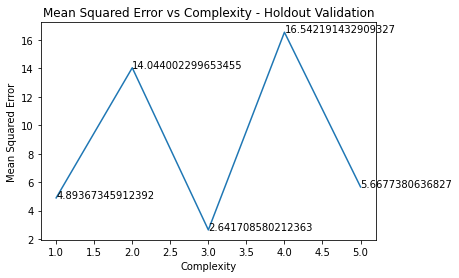

In [41]:
plt.plot(complexity, score_holdout)
# add labels and title
plt.xlabel('Complexity')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Complexity - Holdout Validation')
for a,b in zip(complexity, score_holdout): 
    plt.text(a, b, str(b))
# show the plot
plt.figsize = 10,10
plt.show()

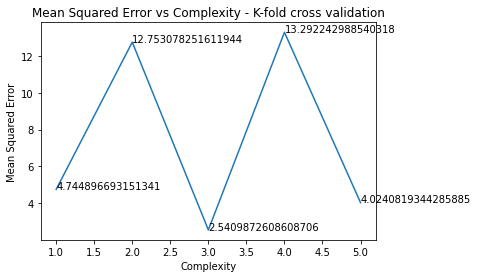

In [42]:
plt.plot(complexity, scores_cv)

# add labels and title
plt.xlabel('Complexity')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Complexity - K-fold cross validation')
for a,b in zip(complexity, scores_cv): 
    plt.text(a, b, str(b))
# show the plot
plt.show()

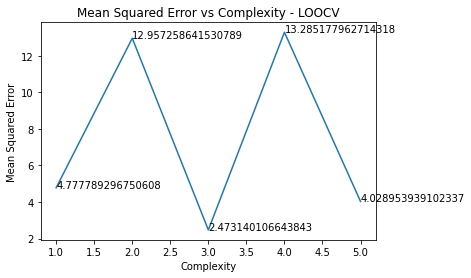

In [43]:
plt.plot(complexity, scores_loocv)

# add labels and title
plt.xlabel('Complexity')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Complexity - LOOCV')
for a,b in zip(complexity, scores_loocv): 
    plt.text(a, b, str(b))
# show the plot
plt.show()